**CHAPLTER 6**

**VGG16 Transfer Learning Model Overview**

Implemented a VGG16-based transfer learning model for maize leaf disease classification. The base VGG16 model was pretrained on the ImageNet dataset and used as a fixed feature extractor by freezing all convolutional layers. A custom classification head was added to the model.

**Architecture Includes:**

VGG16 base with pretrained ImageNet weights (include_top=False)

All convolutional layers frozen (non-trainable)

**Custom classification head:**

Flatten layer to convert feature maps to a 1D vector

Dense layer with 512 neurons and ReLU activation

Dropout layer with a rate of 0.3

Final Dense layer with 4 neurons and softmax activation

**The model classifies images into 4 classes:**

Common Rust

Blight

Gray Leaf Spot

Healthy

**Training Details:**

Optimizer: Adam

Learning Rate: Default (from Adam)

Loss Function: Categorical Crossentropy

Evaluation Metric: Accuracy

Epochs: 20

Batch Size: 64

**Dataset:**

Training images: 4141

Validation images: 516

Test images: 522

**Total Number of Parameters:**

Total parameters: 27,562,308

Trainable parameters: 12,847,620

Non-trainable parameters: 14,714,688

Approximate Model Size: 105.14 MB

**Performance:**

Final Training Accuracy: 98.74%

Final Validation Accuracy: 92.64%

Final Test Accuracy: 93.87%

**Tools & Libraries:**

TensorFlow / Keras for model development

Matplotlib and Seaborn for visualization

Pretrained VGG16 model from keras.applications

In [1]:
#importing libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint



2025-06-15 12:12:47.997598: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749989568.191620      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749989568.246114      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
# ========================
# Step 1: Paths & Settings
# ========================
base_dir = '/kaggle/input/maize-leaf-dataset/split_dataset'
img_size = (224, 224)
batch_size =64
num_classes = 4
epochs = 20


In [3]:
# =============================
# Step 2: Data Preparation
# =============================
datagen = ImageDataGenerator(rescale=1./255)

train_gen = datagen.flow_from_directory(
    os.path.join(base_dir, 'train'),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_gen = datagen.flow_from_directory(
    os.path.join(base_dir, 'val'),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_gen = datagen.flow_from_directory(
    os.path.join(base_dir, 'test'),
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

class_names = list(train_gen.class_indices.keys())

Found 4141 images belonging to 4 classes.
Found 516 images belonging to 4 classes.
Found 522 images belonging to 4 classes.


In [4]:

# Step 3: Build VGG16 Model

base_model = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False  # Freeze base layers

x = Flatten()(base_model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

I0000 00:00:1749989582.792878      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 27,562,308 (105.14 MB)

 Trainable params: 12,847,620 (49.01 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

| Layer Type      | Count | Key Contributors                            |
| --------------- | ----- | ------------------------------------------- |
| Conv2D          | 13    | Majority of operations (96% of total FLOPs) |
| MaxPooling2D    | 5     | No MACs; only dimensionality reduction      |
| Dense           | 2     | Trainable layers (≈26 million FLOPs)        |
| Flatten/Dropout | 2     | No computational cost                       |


**VGG16 Layer-wise Operation Calculation**


| **Layer**     | **Output Shape**  | **MACs**                   | **FLOPs** | **Notes**             |
| ------------- | ----------------- | -------------------------- | --------- | --------------------- |
| block1\_conv1 | 224×224×64        | 224×224×64×3×3×3 = 8.64M   | 17.29M    | Input: 3 channels     |
| block1\_conv2 | 224×224×64        | 224×224×64×3×3×64 = 231M   | 462M      |                       |
| block1\_pool  | 112×112×64        | 0                          | 0         | MaxPooling: No MACs   |
| block2\_conv1 | 112×112×128       | 112×112×128×3×3×64 = 258M  | 516M      |                       |
| block2\_conv2 | 112×112×128       | 112×112×128×3×3×128 = 516M | 1.03B     |                       |
| block2\_pool  | 56×56×128         | 0                          | 0         |                       |
| block3\_conv1 | 56×56×256         | 56×56×256×3×3×128 = 258M   | 516M      |                       |
| block3\_conv2 | 56×56×256         | 56×56×256×3×3×256 = 516M   | 1.03B     |                       |
| block3\_conv3 | 56×56×256         | 56×56×256×3×3×256 = 516M   | 1.03B     |                       |
| block3\_pool  | 28×28×256         | 0                          | 0         |                       |
| block4\_conv1 | 28×28×512         | 28×28×512×3×3×256 = 258M   | 516M      |                       |
| block4\_conv2 | 28×28×512         | 28×28×512×3×3×512 = 516M   | 1.03B     |                       |
| block4\_conv3 | 28×28×512         | 28×28×512×3×3×512 = 516M   | 1.03B     |                       |
| block4\_pool  | 14×14×512         | 0                          | 0         |                       |
| block5\_conv1 | 14×14×512         | 14×14×512×3×3×512 = 129M   | 258M      |                       |
| block5\_conv2 | 14×14×512         | 14×14×512×3×3×512 = 129M   | 258M      |                       |
| block5\_conv3 | 14×14×512         | 14×14×512×3×3×512 = 129M   | 258M      |                       |
| block5\_pool  | 7×7×512           | 0                          | 0         |                       |
| flatten       | 25088             | 0                          | 0         | No compute            |
| dense (512)   | 25088×512 = 12.8M | 12.8M                      | 25.6M     | Fully connected layer |
| dropout       | 512               | 0                          | 0         | No compute            |
| dense (4)     | 512×4 = 2,048     | 2,048                      | 4,096     | Final output          |




Total params: 27,562,308 (105.14 MB)

Trainable params: 12,847,620 (49.01 MB)

Non-trainable params: 14,714,688 (56.13 MB)

In [5]:

# =============================
# Step 4: Train the Model
# =============================
history = model.fit(
    train_gen,
    epochs=epochs,
    validation_data=val_gen
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20


I0000 00:00:1749989587.816362     112 service.cc:148] XLA service 0x7863d800ed80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1749989587.817154     112 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1749989588.301661     112 cuda_dnn.cc:529] Loaded cuDNN version 90300


 1/65 ━━━━━━━━━━━━━━━━━━━━ 19:04 18s/step - accuracy: 0.1875 - loss: 1.8521

I0000 00:00:1749989603.348453     112 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


65/65 ━━━━━━━━━━━━━━━━━━━━ 57s 612ms/step - accuracy: 0.6235 - loss: 2.7359 - val_accuracy: 0.8876 - val_loss: 0.2944
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 16s 244ms/step - accuracy: 0.9278 - loss: 0.2049 - val_accuracy: 0.8333 - val_loss: 0.4505
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 16s 243ms/step - accuracy: 0.9317 - loss: 0.1910 - val_accuracy: 0.9225 - val_loss: 0.2568
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 16s 242ms/step - accuracy: 0.9633 - loss: 0.1028 - val_accuracy: 0.8895 - val_loss: 0.3020
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 16s 243ms/step - accuracy: 0.9713 - loss: 0.0869 - val_accuracy: 0.9225 - val_loss: 0.2499
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 15s 227ms/step - accuracy: 0.9879 - loss: 0.0468 - val_accuracy: 0.9341 - val_loss: 0.2430
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 15s 232ms/step - accuracy: 0.9920 - loss: 0.0375 - val_accuracy: 0.9302 - val_loss: 0.2813
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 17s 253ms/step - accuracy: 0.9873 - loss: 0.0401 - val_accuracy: 0.934

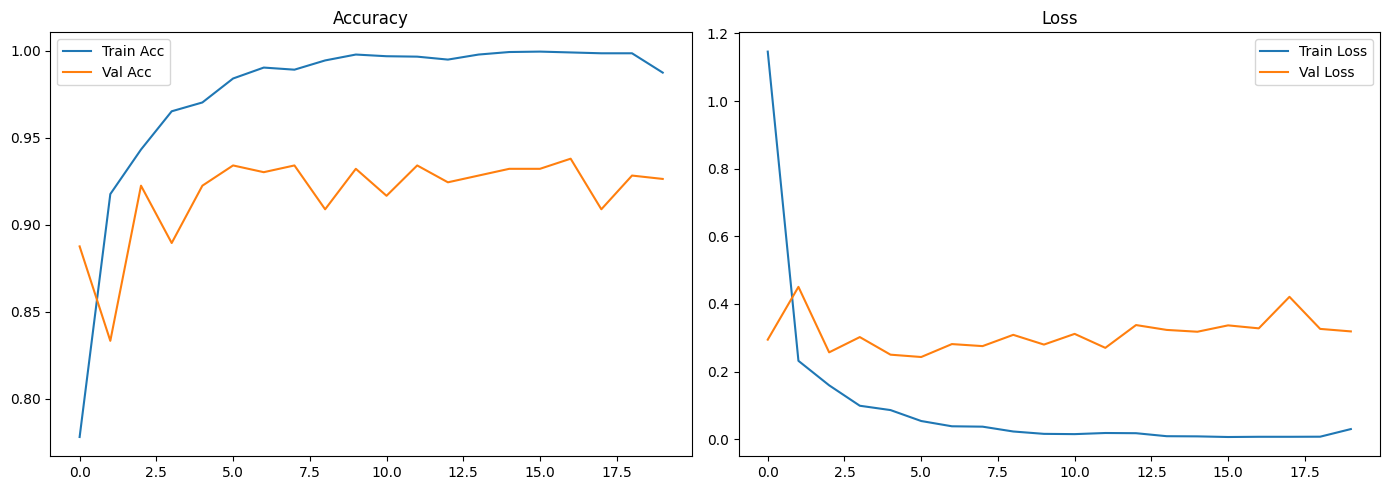

In [6]:
# =============================
# Step 5: Plot Accuracy & Loss
# =============================
def plot_metrics(history):
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_metrics(history)


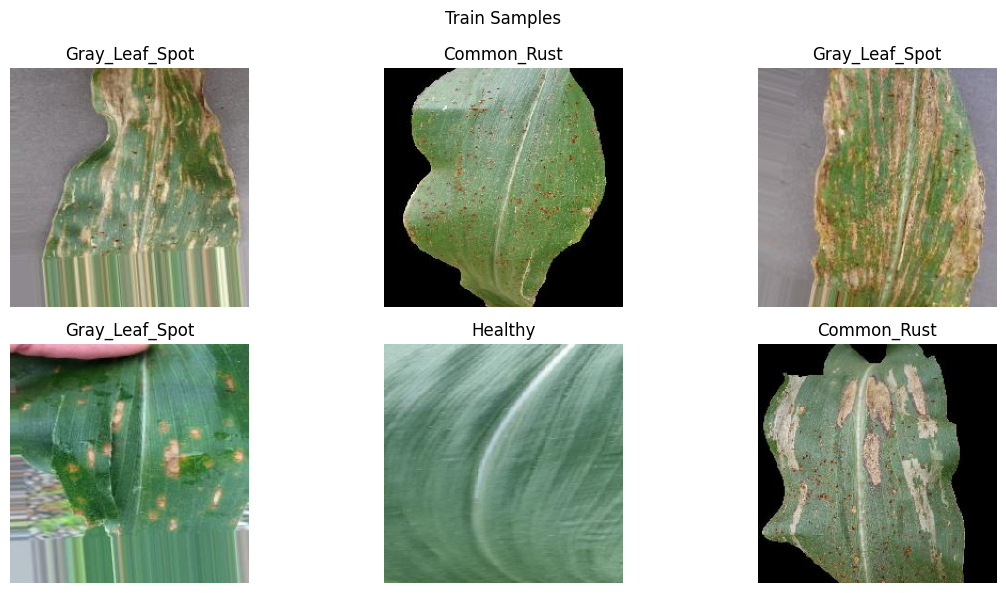

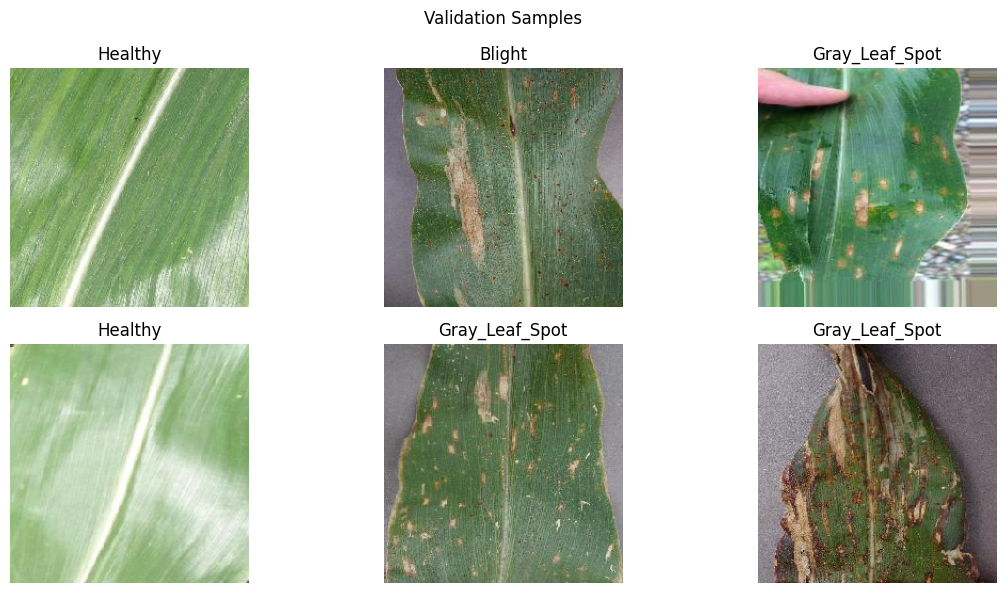

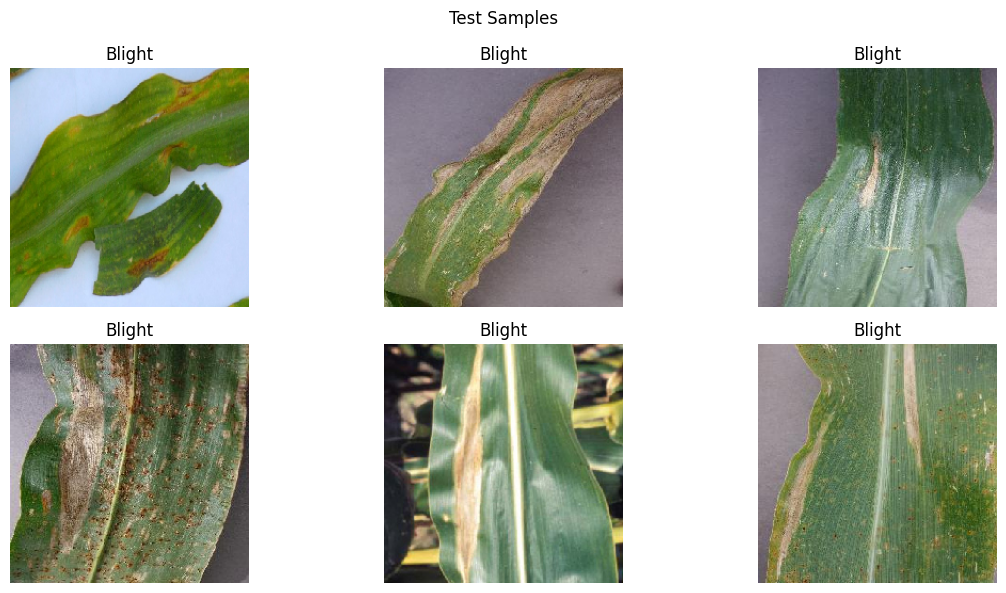

In [7]:
# =============================
# Step 6: Print Sample Images
# =============================
def show_sample_images(data_gen, title):
    x, y = next(data_gen)
    plt.figure(figsize=(12, 6))
    for i in range(6):
        plt.subplot(2, 3, i+1)
        plt.imshow(x[i])
        label = class_names[np.argmax(y[i])]
        plt.title(label)
        plt.axis('off')
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

show_sample_images(train_gen, "Train Samples")
show_sample_images(val_gen, "Validation Samples")
show_sample_images(test_gen, "Test Samples")


9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 759ms/step


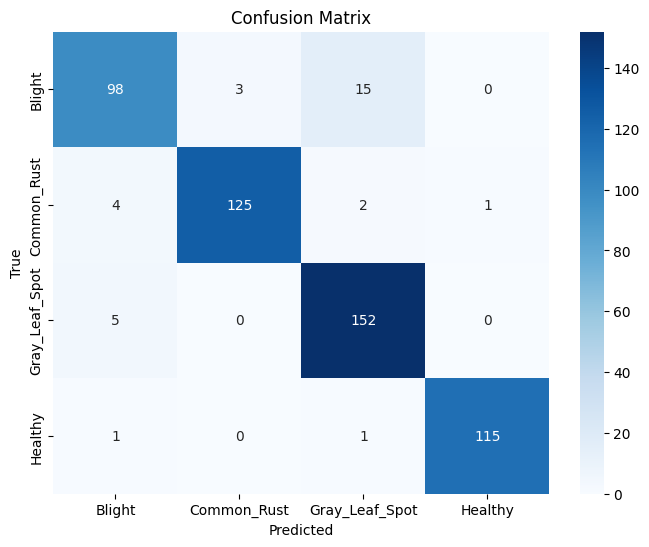


Classification Report:

                precision    recall  f1-score   support

        Blight       0.91      0.84      0.88       116
   Common_Rust       0.98      0.95      0.96       132
Gray_Leaf_Spot       0.89      0.97      0.93       157
       Healthy       0.99      0.98      0.99       117

      accuracy                           0.94       522
     macro avg       0.94      0.94      0.94       522
  weighted avg       0.94      0.94      0.94       522



In [8]:
# =============================
# Step 7: Confusion Matrix
# =============================
# Predict
y_pred = model.predict(test_gen)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true =test_gen.classes

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig("confusion_matrix.png")
plt.show()

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes, target_names=class_names))


In [9]:
# 6. Print Train and Validation Accuracy
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

print(f"\n✅ Final Training Accuracy: {train_acc[-1]*100:.2f}%")
print(f"✅ Final Validation Accuracy: {val_acc[-1]*100:.2f}%")

test_loss, test_acc = model.evaluate(test_gen)
print(f"✅ Test Accuracy: {test_acc*100:.2f}%")




✅ Final Training Accuracy: 98.74%
✅ Final Validation Accuracy: 92.64%
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 253ms/step - accuracy: 0.9019 - loss: 0.2993
✅ Test Accuracy: 93.87%


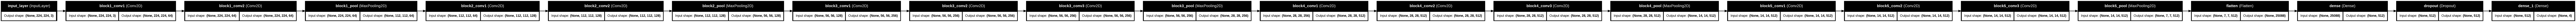

In [10]:

from tensorflow.keras.utils import plot_model

# Save the model architecture as a simple horizontal image
plot_model(model,
           to_file='model_architecture.png',
           show_shapes=True,
           show_layer_names=True,
           rankdir='LR')  # LR = Left to Right
from IPython.display import Image
Image(filename='model_architecture.png')



In [11]:
# After training your model
model.save("vgg16_model.h5")



Class: Blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


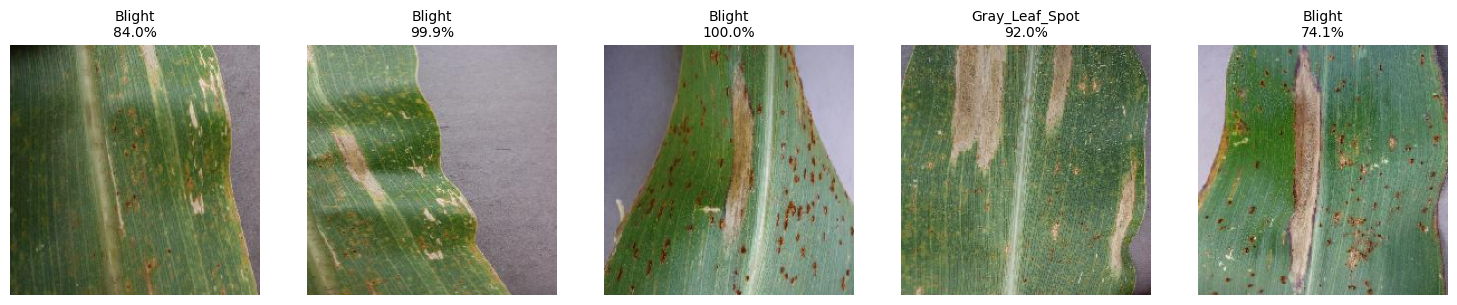


Class: Common_Rust
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


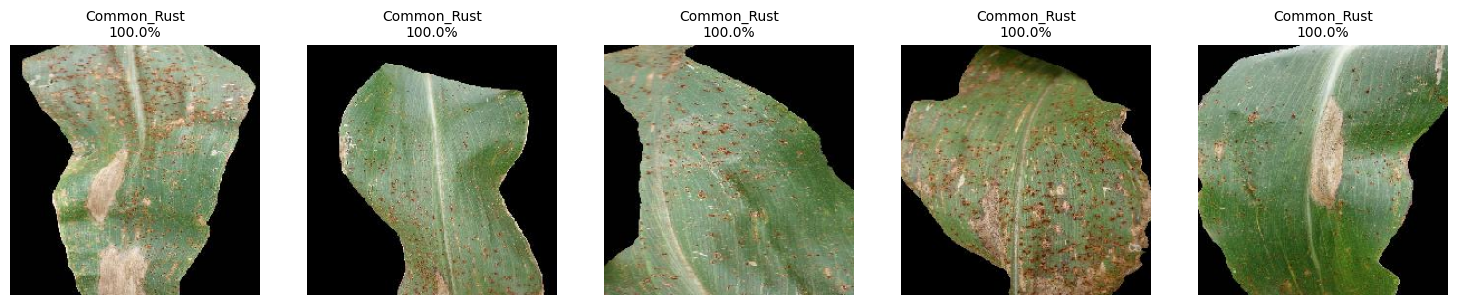


Class: Gray_Leaf_Spot
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


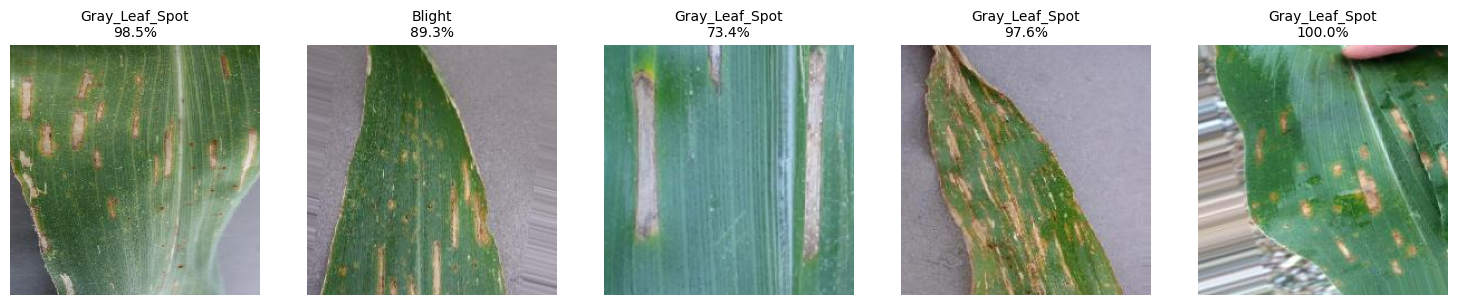


Class: Healthy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


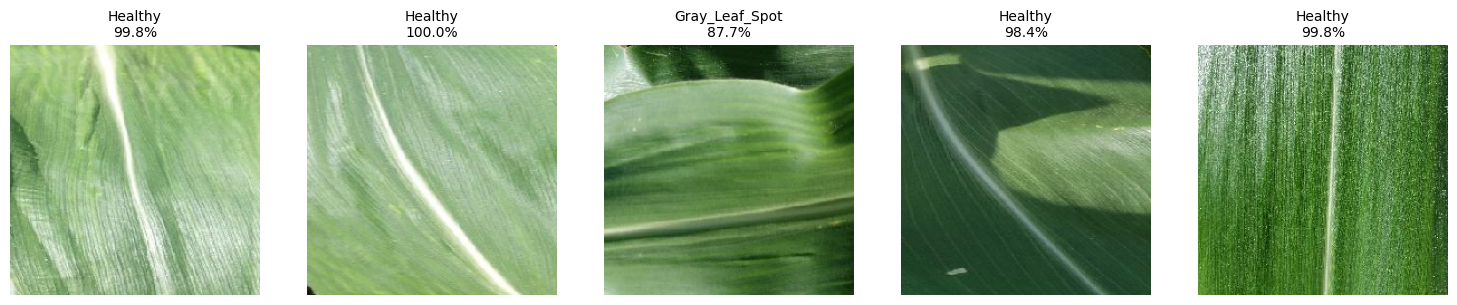

In [12]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Paths (change these if needed)
test_dir = '/kaggle/input/maize-leaf-dataset/split_dataset/test'    # Your test dataset folder
model_path = 'vgg16_model.h5'            # Your trained model

# Load the model
model = load_model(model_path)

# Image size
img_size = (224, 224)

# Get class names from test folder
class_names = sorted(os.listdir(test_dir))

# Go through each class
for class_name in class_names:
    class_path = os.path.join(test_dir, class_name)
    image_files = [f for f in os.listdir(class_path) if f.lower().endswith(('jpg', 'jpeg', 'png'))]
    selected_images = random.sample(image_files, 5)  # Pick 5 random images

    print(f"\nClass: {class_name}")
    plt.figure(figsize=(15, 3))

    for i, img_file in enumerate(selected_images):
        img_path = os.path.join(class_path, img_file)
        img = load_img(img_path, target_size=img_size)
        img_array = img_to_array(img) / 255.0
        img_array = np.expand_dims(img_array, axis=0)

        # Predict
        prediction = model.predict(img_array)
        pred_class = class_names[np.argmax(prediction)]
        confidence = np.max(prediction) * 100

        # Show image and prediction
        plt.subplot(1, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f'{pred_class}\n{confidence:.1f}%', fontsize=10)

    plt.tight_layout()
    plt.show()
